In [1]:
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow.keras.layers import Dense,Activation, Input
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import glob
import os
import sklearn
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

Using TensorFlow backend.
2022-04-07 16:13:33.481356: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
data = pd.read_csv(r'/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/data_1.csv',delimiter=",")
data = data.dropna()
data = data.drop_duplicates()
data = data.sample(frac = 1, random_state = 10)
data.shape

(274, 4)

In [3]:
scaler_lat = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
data.CO = scaler_co.fit_transform(data[['CO']])
data.CS = scaler_crack.fit_transform(data[['CS']])
data.FS = scaler_fs.fit_transform(data[['FS']])
data.T = scaler_temp.fit_transform(data[['T']])

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state = 1)
test_x = test[['T', 'CS', 'CO']]
test_y = test['FS']
train_x = train[['T', 'CS', 'CO']]
train_y = train['FS']
test_x.shape

(55, 3)

In [5]:
train.to_csv('train-1.csv')
test.to_csv('test-1.csv')

In [7]:
pa = [x[0] for x in os.walk(r'/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/ANN/new')]
pa


['/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/ANN/new',
 '/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/ANN/new/1_layer_56',
 '/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/ANN/new/2_layer_32-24',
 '/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/ANN/new/3_layer_32-16-8']

In [8]:
path = pa[3]
os.chdir(path)
os.getcwd()

'/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/ANN/new/3_layer_32-16-8'

from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")
model.summary()
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['mse'])

In [11]:
model = Sequential([
    Input(shape = 3),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=8,activation='relu'),
    #Dense(units=2,activation='relu'),
    Dense(units=1,activation='linear')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


2022-04-07 16:53:08.879902: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-07 16:53:08.882392: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-07 16:53:09.811402: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-07 16:53:09.811470: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sp097-ThinkStation-P720): /proc/driver/nvidia/version does not exist
2022-04-07 16:53:09.812716: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropr

model = Sequential([
    Dense(units=8,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1, activation = 'relu'),
    ])

model = Sequential([
    Input(shape = 3),
    Dense(units=64,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=8,activation='relu'),
    Dense(units=1,activation='relu')
    ])
model.summary()

2022-04-07 16:53:15.151153: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-07 16:53:15.169228: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/200
50/50 [==============================] - 2s 23ms/step - loss: 0.0951 - mse: 0.0951 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0732 - val_mse: 0.0732
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0497 - val_mse: 0.0497
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 8/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0238 - 

50/50 [==============================] - 0s 3ms/step - loss: 5.5446e-04 - mse: 5.5446e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 121/200
50/50 [==============================] - 0s 3ms/step - loss: 2.1469e-04 - mse: 2.1469e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 122/200
50/50 [==============================] - 0s 2ms/step - loss: 4.2089e-04 - mse: 4.2089e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 123/200
50/50 [==============================] - 0s 3ms/step - loss: 4.6479e-04 - mse: 4.6479e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 124/200
50/50 [==============================] - 0s 3ms/step - loss: 2.3817e-04 - mse: 2.3817e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 125/200
50/50 [==============================] - 0s 3ms/step - loss: 1.8563e-04 - mse: 1.8563e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 126/200
50/50 [==============================] - 0s 3ms/step - loss: 2.6392e-04 - mse: 2.6392e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 127/200
50/50 [======

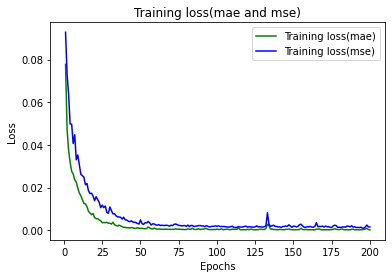

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['mse'])
history_1 = model.fit(train_x,train_y,epochs=200,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,201)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
50/50 [==============================] - 1s 9ms/step - loss: 8.0377e-05 - mse: 8.0377e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/400
50/50 [==============================] - 0s 4ms/step - loss: 9.7845e-05 - mse: 9.7845e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/400
50/50 [==============================] - 0s 5ms/step - loss: 1.4002e-04 - mse: 1.4002e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/400
50/50 [==============================] - 0s 4ms/step - loss: 8.5804e-05 - mse: 8.5804e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/400
50/50 [==============================] - 0s 3ms/step - loss: 8.2147e-05 - mse: 8.2147e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/400
50/50 [==============================] - 0s 4ms/step - loss: 9.9990e-05 - mse: 9.9990e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/400
50/50 [==============================] - 0s 5ms/step - loss: 1.1014e-04 - mse: 1.1014e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/400
50/50 [========

50/50 [==============================] - 0s 3ms/step - loss: 6.1780e-05 - mse: 6.1780e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 118/400
50/50 [==============================] - 0s 3ms/step - loss: 8.0094e-05 - mse: 8.0094e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 119/400
50/50 [==============================] - 0s 3ms/step - loss: 8.0052e-05 - mse: 8.0052e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 120/400
50/50 [==============================] - 0s 3ms/step - loss: 4.6210e-05 - mse: 4.6210e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 121/400
50/50 [==============================] - 0s 3ms/step - loss: 8.2111e-05 - mse: 8.2111e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 122/400
50/50 [==============================] - 0s 2ms/step - loss: 6.8517e-05 - mse: 6.8517e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 123/400
50/50 [==============================] - 0s 3ms/step - loss: 6.9120e-05 - mse: 6.9120e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 124/400
50/50 [======

50/50 [==============================] - 0s 4ms/step - loss: 6.2377e-05 - mse: 6.2377e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 234/400
50/50 [==============================] - 0s 3ms/step - loss: 6.7390e-05 - mse: 6.7390e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 235/400
50/50 [==============================] - 0s 3ms/step - loss: 8.6267e-05 - mse: 8.6267e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 236/400
50/50 [==============================] - 0s 3ms/step - loss: 4.3271e-05 - mse: 4.3271e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 237/400
50/50 [==============================] - 0s 2ms/step - loss: 7.2126e-05 - mse: 7.2126e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 238/400
50/50 [==============================] - 0s 3ms/step - loss: 7.6143e-05 - mse: 7.6143e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 239/400
50/50 [==============================] - 0s 3ms/step - loss: 4.9779e-05 - mse: 4.9779e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 240/400
50/50 [======

50/50 [==============================] - 0s 3ms/step - loss: 5.8770e-05 - mse: 5.8770e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 350/400
50/50 [==============================] - 0s 3ms/step - loss: 6.9751e-05 - mse: 6.9751e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 351/400
50/50 [==============================] - 0s 3ms/step - loss: 5.6743e-05 - mse: 5.6743e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 352/400
50/50 [==============================] - 0s 6ms/step - loss: 4.9234e-05 - mse: 4.9234e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 353/400
50/50 [==============================] - 0s 3ms/step - loss: 6.2579e-05 - mse: 6.2579e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 354/400
50/50 [==============================] - 0s 3ms/step - loss: 5.7968e-05 - mse: 5.7968e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 355/400
50/50 [==============================] - 0s 4ms/step - loss: 6.1346e-05 - mse: 6.1346e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 356/400
50/50 [======

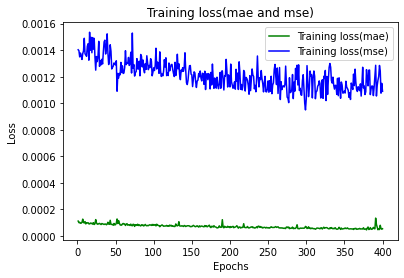

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics = ['mse'])
history_2 = model.fit(train_x,train_y,epochs=400,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)
#y_pred = model.predict(test_x)
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
50/50 [==============================] - 1s 15ms/step - loss: 5.0855e-05 - mse: 5.0855e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/400
50/50 [==============================] - 0s 3ms/step - loss: 5.8674e-05 - mse: 5.8674e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/400
50/50 [==============================] - 0s 3ms/step - loss: 4.2045e-05 - mse: 4.2045e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/400
50/50 [==============================] - 0s 5ms/step - loss: 4.3535e-05 - mse: 4.3535e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/400
50/50 [==============================] - 0s 6ms/step - loss: 4.5614e-05 - mse: 4.5614e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 6/400
50/50 [==============================] - 0s 3ms/step - loss: 4.2021e-05 - mse: 4.2021e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/400
50/50 [==============================] - 0s 4ms/step - loss: 3.5398e-05 - mse: 3.5398e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/400
50/50 [=======

50/50 [==============================] - 0s 3ms/step - loss: 4.5870e-05 - mse: 4.5870e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 118/400
50/50 [==============================] - 0s 3ms/step - loss: 4.5837e-05 - mse: 4.5837e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/400
50/50 [==============================] - 0s 3ms/step - loss: 5.1503e-05 - mse: 5.1503e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 120/400
50/50 [==============================] - 0s 3ms/step - loss: 3.9056e-05 - mse: 3.9056e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 121/400
50/50 [==============================] - 0s 3ms/step - loss: 3.8331e-05 - mse: 3.8331e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 122/400
50/50 [==============================] - 0s 3ms/step - loss: 5.2241e-05 - mse: 5.2241e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 123/400
50/50 [==============================] - 0s 2ms/step - loss: 4.5793e-05 - mse: 4.5793e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 124/400
50/50 [======

50/50 [==============================] - 0s 3ms/step - loss: 4.9937e-05 - mse: 4.9937e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 234/400
50/50 [==============================] - 0s 3ms/step - loss: 4.1072e-05 - mse: 4.1072e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 235/400
50/50 [==============================] - 0s 5ms/step - loss: 3.8286e-05 - mse: 3.8286e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 236/400
50/50 [==============================] - 0s 5ms/step - loss: 4.0817e-05 - mse: 4.0817e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 237/400
50/50 [==============================] - 0s 3ms/step - loss: 3.4740e-05 - mse: 3.4740e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 238/400
50/50 [==============================] - 0s 3ms/step - loss: 5.1600e-05 - mse: 5.1600e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 239/400
50/50 [==============================] - 0s 2ms/step - loss: 4.1623e-05 - mse: 4.1623e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 240/400
50/50 [======

50/50 [==============================] - 0s 5ms/step - loss: 3.6780e-05 - mse: 3.6780e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 350/400
50/50 [==============================] - 0s 6ms/step - loss: 2.6561e-05 - mse: 2.6561e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 351/400
50/50 [==============================] - 0s 5ms/step - loss: 4.3842e-05 - mse: 4.3842e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 352/400
50/50 [==============================] - 0s 6ms/step - loss: 4.1427e-05 - mse: 4.1427e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 353/400
50/50 [==============================] - 0s 4ms/step - loss: 3.5931e-05 - mse: 3.5931e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 354/400
50/50 [==============================] - 0s 5ms/step - loss: 3.1181e-05 - mse: 3.1181e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 355/400
50/50 [==============================] - 0s 7ms/step - loss: 4.3639e-05 - mse: 4.3639e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 356/400
50/50 [======

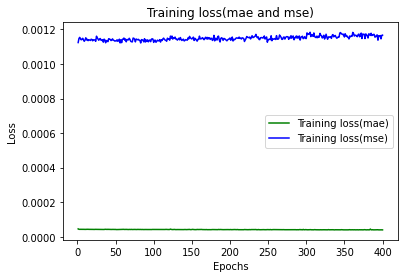

In [17]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics = ['mse'])
history_3 = model.fit(train_x,train_y,epochs=400,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)

loss_train = history_3.history['loss']
loss_val = history_3.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(test_x).reshape(-1,1)
model.evaluate(test_x, test_y, batch_size = 2)
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y))
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

28/28 [==============================] - 0s 1ms/step - loss: 2.9762e-04 - mse: 2.9762e-04
0.0002976185740469895 0.9935588953858232
17.914170053853642 0.9935588963251469
3.910689269383125


In [19]:
y_pred = model.predict(test_x).reshape(-1,1)
y_pred= scaler_fs.inverse_transform(y_pred)
y_pred

array([[ 97.15779 ],
       [ 72.47934 ],
       [ 38.42682 ],
       [121.04514 ],
       [ 36.941025],
       [ 38.360138],
       [176.7828  ],
       [ 48.12591 ],
       [ 22.624565],
       [260.44714 ],
       [ 24.540918],
       [ 41.772774],
       [ 64.581116],
       [ 26.162523],
       [ 94.56164 ],
       [ 30.867369],
       [ 48.83592 ],
       [ 64.54162 ],
       [ 86.21201 ],
       [ 81.917274],
       [ 59.50403 ],
       [ 61.16804 ],
       [ 43.086056],
       [ 37.224762],
       [ 49.45977 ],
       [ 76.96639 ],
       [ 47.507004],
       [ 35.8389  ],
       [104.25598 ],
       [ 22.151075],
       [ 22.682226],
       [ 57.23123 ],
       [195.26685 ],
       [ 22.78364 ],
       [ 70.95836 ],
       [ 38.83626 ],
       [ 35.424477],
       [ 56.936234],
       [ 52.81815 ],
       [ 59.904507],
       [ 35.89257 ],
       [249.61864 ],
       [ 81.64992 ],
       [133.6658  ],
       [ 64.35753 ],
       [ 55.57608 ],
       [174.0318  ],
       [ 32.8

test_x = pd.read_csv(r'/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/pred_0.csv',delimiter=",")
test_x.CO = scaler_co.transform(test_x[['CO']])
test_x.CS = scaler_crack.transform(test_x[['CS']])
test_x.T = scaler_temp.transform(test_x[['T']])
test_x = test_x[['T', 'CS', 'CO']]

In [21]:
y_pred_t = model.predict(train_x).reshape(-1,1)
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y))
model.evaluate(train_x, train_y, batch_size = 2)
test_y_np = np.array(train_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in_t = scaler_fs.inverse_transform(y_pred_t)
y_test_in_t = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t))
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100)

0.00015229076090579407 0.9975542945869667
110/110 [==============================] - 0s 1ms/step - loss: 1.5229e-04 - mse: 1.5229e-04
9.166646671035972 0.9975542934155237
2.0418377096756637


In [22]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df = df.sort_values('Error', ascending = 0)
df.head(20)

,Prediced,True,Error
18,86.212013,102.010,15.797987
43,133.665802,119.962,13.703802
32,195.266846,207.620,12.353154
41,249.618637,258.410,8.791363
3,121.045143,128.487,7.441857
25,76.966393,70.590,6.376393
19,81.917274,76.690,5.227274
50,54.497284,50.050,4.447284
14,94.561638,98.680,4.118362
0,97.157791,93.120,4.037791


In [23]:
#path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\new\3_layer_32-16-8'
#os.mkdir(path)
os.chdir(path)

os.remove("model.json")
os.remove("info.txt")
os.getcwd()

'/media/sp097/SOLAR/MachineLearning_Graphene/ML Model/ANN/new/3_layer_32-16-8'

In [ ]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True.csv')
t = []
k = y_test_in_t.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in_t[i])
    m = (float)(y_test_in_t[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True_train.csv')

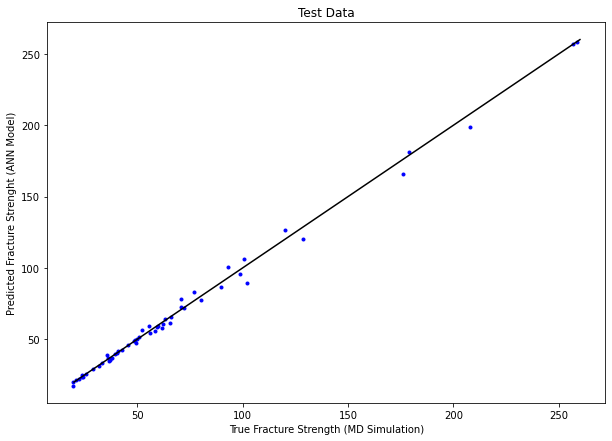

In [153]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "blue")

plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Test Data')
plt.plot([20,260], [20, 260], color = 'black')
plt.savefig('TrueVsPred.png', dpi = 100)
plt.show()

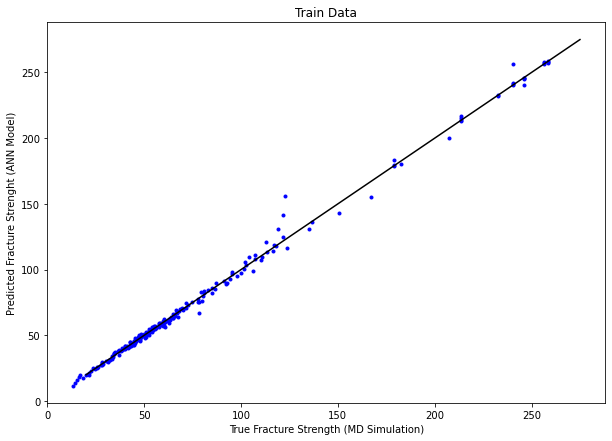

In [154]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in_t, y_pred_in_t, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Train Data')
plt.plot([20,275], [20, 275], color = 'black')
plt.savefig('TrueVsPred_train.png', dpi = 100)
plt.show()

In [155]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [156]:

# convert the history.history dict to a pandas DataFrame:     
hist_df_1 = pd.DataFrame(history_1.history) 
hist_df_2 = pd.DataFrame(history_2.history)
hist_df_3 = pd.DataFrame(history_3.history)
hist_df = hist_df_1.append(hist_df_2, ignore_index = True)
hist_df = hist_df.append(hist_df_3, ignore_index = True)
# or save to csv: 
hist_df.to_csv('history.csv')
    
file1 = open("info.txt","a")
file1.write("Learning rate = 0.001 for 200 train test split = 0.10  validation_split = 0.1 of train loss = mse batch size = 4\n")
file1.write("Learning rate = 0.0001 for 400 train test split = 0.10 validation_split = 0.1 of train loss = mse \n")
file1.write("Learning rate = 0.00001 for 400 train test split = 0.10 loss = mae \n")
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y),'\n', file = file1)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100, '\n', file = file1)
file1.close()

1000


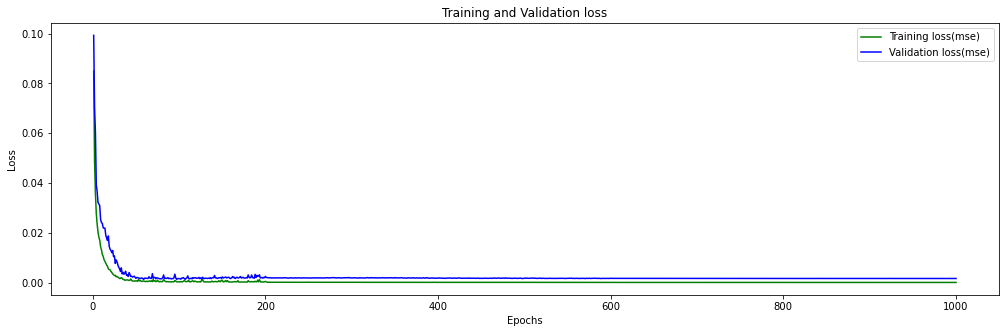

In [157]:
loss_train = hist_df['loss']
loss_val = hist_df['val_loss']
epochs = range(1,1001)
print(len(epochs))
fig = plt.figure(figsize=(17, 5))
plt.plot(epochs, loss_train, 'g', label='Training loss(mse)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Lossvepochs.png', dpi = 100)
plt.show()

C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN


In [134]:
import os
#path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\6_layer_6-16-32-128-32-16'
path = pa[-1]
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'

In [585]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [586]:
loaded_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 6)                 24        
_________________________________________________________________
dense_125 (Dense)            (None, 16)                112       
_________________________________________________________________
dense_126 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_127 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_128 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_129 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_130 (Dense)            (None, 1)               

In [587]:
cd ..

C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN


In [588]:
y_pred = loaded_model.predict(test_x)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

0.01692689022291969 0.7673543037685601
4.089170742311351
4.152843320375811 0.767354352751541


In [141]:
test_x_in = test_x.copy()
test_x_in.LO = scaler_lat.inverse_transform(test_x_in[['LO']])
test_x_in.CS = scaler_crack.inverse_transform(test_x_in[['CS']])
test_x_in.T = scaler_temp.inverse_transform(test_x_in[['T']]) 

In [142]:
test_x_in

,LO,T,CS
26,0.0,300.0,0.8
86,13.9,600.0,0.5
54,13.9,0.0,0.0
12,0.0,100.0,0.3
65,13.9,100.0,0.2
50,0.0,1200.0,0.5
49,0.0,1200.0,0.4
40,0.0,900.0,0.4
68,13.9,100.0,0.5
20,0.0,300.0,0.2


In [64]:
test_x = test_data[['LO', 'T', 'CS']]
test_y = test_data['FS']
train_x = data[['LO', 'T', 'CS']]
train_y = data['FS']

In [36]:
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    #model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mae', 'mse'])
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=2, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,X= train_x, y = train_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


KeyboardInterrupt: 